In [28]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import geopandas as gpd
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib
import matplotlib.patches as mpatches
import osmnx

In [2]:
spatial_units = gpd.read_file('../data/processed_data/zones_delineation/PC_Delft.gpkg')
spatial_units = spatial_units.drop(columns = ['Postcode','gemeente','area_ratio'])

In [3]:
boundaries = spatial_units.dissolve()

In [4]:
exposure = pd.read_csv('../data/results/exposure/Delft_exposure.csv', usecols= ['id_unit','expos_NW'])

In [5]:
spatial_units = spatial_units.merge(exposure, on = 'id_unit')
average_expos = spatial_units['expos_NW'].mean()
std_expos = spatial_units['expos_NW'].std()

In [6]:
regions = gpd.read_file('../data/results/regions/regions.gpkg')

In [7]:
regions_city = regions.loc[(regions['seg'] == 1) & (regions['city'] == 'Delft')]

In [8]:
spatial_units['exp_norm'] = 0
spatial_units['exp_norm'] = (spatial_units['expos_NW']-average_expos)/std_expos

In [9]:
color_seg = ['#f7d500','#d65800','#a11096']
spatial_units['color'] = color_seg[1]
spatial_units['color'] = spatial_units['color'].mask(spatial_units['exp_norm'] <= -1/3,color_seg[0])
spatial_units['color'] = spatial_units['color'].mask(spatial_units['exp_norm'] > 1/3,color_seg[2])

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.margins(0)
spatial_units.plot(ax=ax,
                   color = spatial_units['color'],
                   edgecolor = spatial_units['color'])

regions_city.plot(ax=ax,color = 'none',hatch='\\\\')

# legend
patch_0 = mpatches.Patch(color = 'None',label='Exposure level:')
patch_1 = mpatches.Patch(color=color_seg[0], label='$< \mu - \sigma^2/3$')
patch_2 = mpatches.Patch(color=color_seg[1], label='$[\mu - \sigma^2/3 , \mu + \sigma^2/3]$')
patch_3 = mpatches.Patch(color=color_seg[2], label='$\geq \mu + \sigma^2/3$')
patch_4 = mpatches.Patch(facecolor='white',edgecolor = 'black',hatch='\\\\\\', label='Segregated region')

ax.legend(handles = [patch_0,patch_1,patch_2,patch_3,patch_4], loc = 'upper right',bbox_to_anchor=(1, 1))
boundaries.plot(ax=ax,color = 'none', edgecolor = 'black')
#df_zones.plot(ax=ax, color  = 'none', edgecolor='black')
ax.axis('off')
ax.add_artist(ScaleBar(dx =1 ,length_fraction=0.3, location = 'lower left'))
fig.savefig('../report/figures/all_cities/Delft_2.svg',bbox_inches=[],pad_inches = 0)
#plt.close()

In [39]:
Bbox([[0,0],[8,8]])

Bbox([[0.0, 0.0], [8.0, 8.0]])

In [50]:
aspect_ratio = (boundaries.bounds['maxy'] - boundaries.bounds['miny']) / \
               (boundaries.bounds['maxx'] - boundaries.bounds['minx'])

In [52]:
1/aspect_ratio

0    0.76613
dtype: float64

1.0


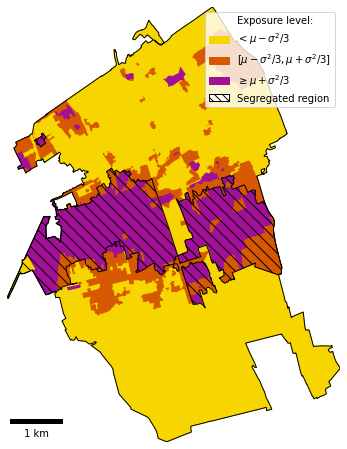

In [46]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.margins(0)
spatial_units.plot(ax=ax,
                   color = spatial_units['color'],
                   edgecolor = spatial_units['color'])

regions_city.plot(ax=ax,color = 'none',hatch='\\\\')

# legend
patch_0 = mpatches.Patch(color = 'None',label='Exposure level:')
patch_1 = mpatches.Patch(color=color_seg[0], label='$< \mu - \sigma^2/3$')
patch_2 = mpatches.Patch(color=color_seg[1], label='$[\mu - \sigma^2/3 , \mu + \sigma^2/3]$')
patch_3 = mpatches.Patch(color=color_seg[2], label='$\geq \mu + \sigma^2/3$')
patch_4 = mpatches.Patch(facecolor='white',edgecolor = 'black',hatch='\\\\\\', label='Segregated region')

ax.legend(handles = [patch_0,patch_1,patch_2,patch_3,patch_4], loc = 'upper right',bbox_to_anchor=(1, 1))
boundaries.plot(ax=ax,color = 'none', edgecolor = 'black')
#df_zones.plot(ax=ax, color  = 'none', edgecolor='black')
ax.axis('off')
ax.add_artist(ScaleBar(dx =1 ,length_fraction=0.3, location = 'lower left'))
fig.savefig('../report/figures/all_cities/Delft_2.svg',bbox_inches='tight',pad_inches = 0)
#plt.close()

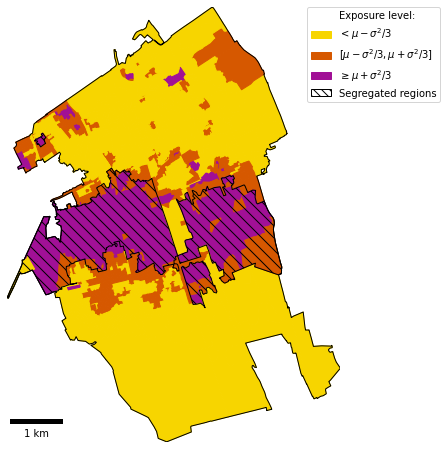

In [25]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.margins(0)
spatial_units.plot(ax=ax,
                   color = spatial_units['color'],
                   edgecolor = spatial_units['color'])

regions_city.plot(ax=ax,color = 'none',hatch='\\\\')

# legend
patch_0 = mpatches.Patch(color = 'None',label='Exposure level:')
patch_1 = mpatches.Patch(color=color_seg[0], label='$< \mu - \sigma^2/3$')
patch_2 = mpatches.Patch(color=color_seg[1], label='$[\mu - \sigma^2/3 , \mu + \sigma^2/3]$')
patch_3 = mpatches.Patch(color=color_seg[2], label='$\geq \mu + \sigma^2/3$')
patch_4 = mpatches.Patch(facecolor='white',edgecolor = 'black',hatch='\\\\\\', label='Segregated regions')

ax.legend(handles = [patch_0,patch_1,patch_2,patch_3,patch_4], loc = 'upper right',bbox_to_anchor=(1.3, 1), borderaxespad=0)
boundaries.plot(ax=ax,color = 'none', edgecolor = 'black')
#df_zones.plot(ax=ax, color  = 'none', edgecolor='black')
ax.axis('off')
ax.add_artist(ScaleBar(dx =1 ,length_fraction=0.3, location = 'lower left'))
#fig.savefig('../report/figures/all_cities/Delft.png')
#plt.close()